In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [32]:
df = pd.read_csv(r"C:\Users\gkgiz\Desktop\CF\Achievement 6\absentee_data_cleaned_wrangled.csv")

In [34]:
df.head()

,Unnamed: 0,Gender,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,0,F,Baker,Bakery,Massachusetts,Stores,32.028816,6.018478,36.577306,Stores
1,1,M,Baker,Bakery,Connecticut,Stores,40.320902,5.532445,30.165072,Stores
2,2,M,Baker,Bakery,New Mexico,Stores,48.822047,4.389973,83.807798,Stores
3,3,F,Baker,Bakery,Nevada,Stores,44.599357,3.081736,70.020165,Stores
4,5,M,Baker,Bakery,Arkansas,Stores,48.440311,2.717692,81.830079,Stores


Dropping the non-numerical values

In [40]:
df =df.drop(['Gender','JobTitle','DepartmentName','StoreLocation','Division','BusinessUnit'], axis=1)

In [42]:
df.head()

,Unnamed: 0,Age,LengthService,AbsentHours
0,0,32.028816,6.018478,36.577306
1,1,40.320902,5.532445,30.165072
2,2,48.822047,4.389973,83.807798
3,3,44.599357,3.081736,70.020165
4,5,48.440311,2.717692,81.830079


# The Elbow Technique

In [55]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [57]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-39538086585.095795,
 -9890478702.840136,
 -4375716302.349832,
 -2477498723.107688,
 -1590418663.1097775,
 -1117772009.8154104,
 -819464455.4332733,
 -639914999.9966568,
 -502727108.63076925]

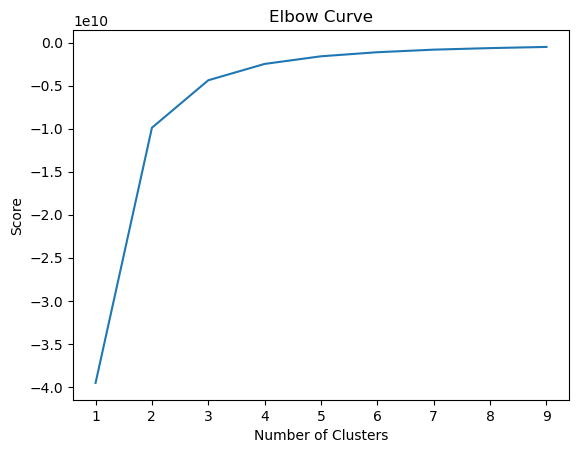

In [59]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [64]:
#There's a large jump from two to three, and three to four, on the x-axis, but after that, the curve straightens out. Therefore the ideal number of clusters for this model is 4.

In [66]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [68]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4)

In [70]:
df['clusters'] = kmeans.fit_predict(df)

In [72]:
df.head()

,Unnamed: 0,Age,LengthService,AbsentHours,clusters
0,0,32.028816,6.018478,36.577306,3
1,1,40.320902,5.532445,30.165072,3
2,2,48.822047,4.389973,83.807798,3
3,3,44.599357,3.081736,70.020165,3
4,5,48.440311,2.717692,81.830079,3


In [74]:
df['clusters'].value_counts()

clusters
1    1797
2    1758
3    1718
0    1710
Name: count, dtype: int64

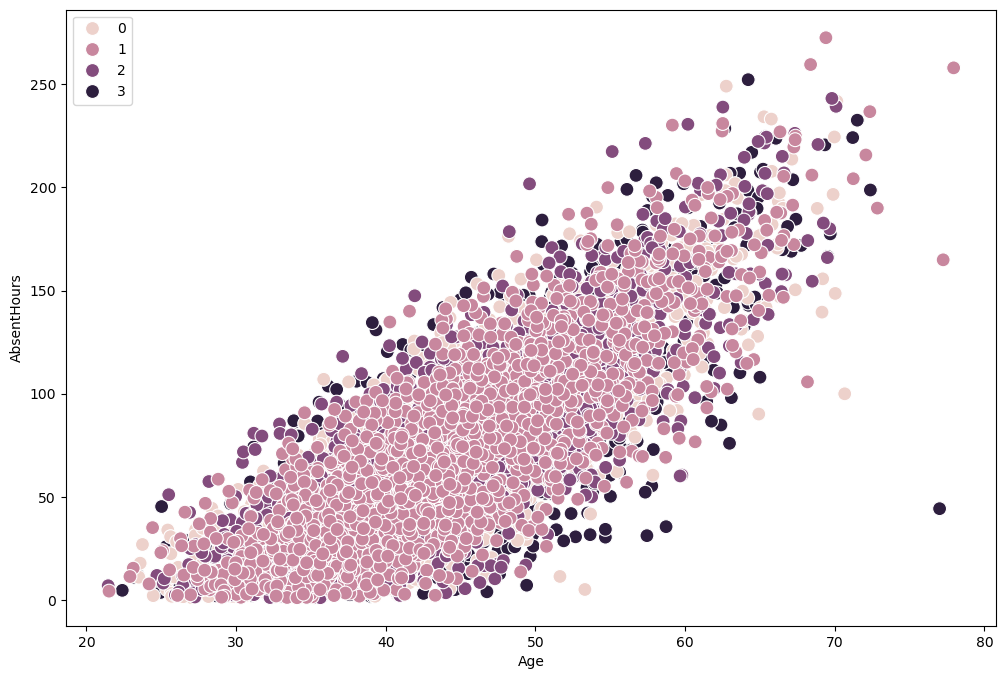

In [78]:
# Plot the clusters for the "Age" and "AbsentHours" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Age'], y=df['AbsentHours'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('AbsentHours') # Label y-axis.
plt.show()

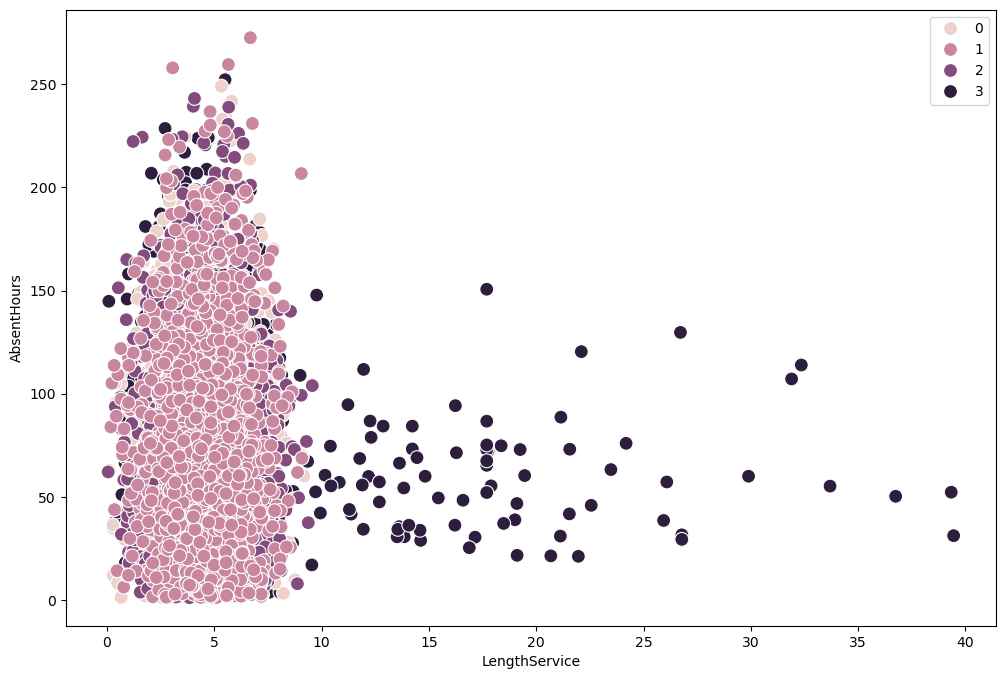

In [80]:
# Plot the clusters for the "LengthService" and "AbsentHours" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['LengthService'], y=df['AbsentHours'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('LengthService') 
plt.ylabel('AbsentHours') 
plt.show()

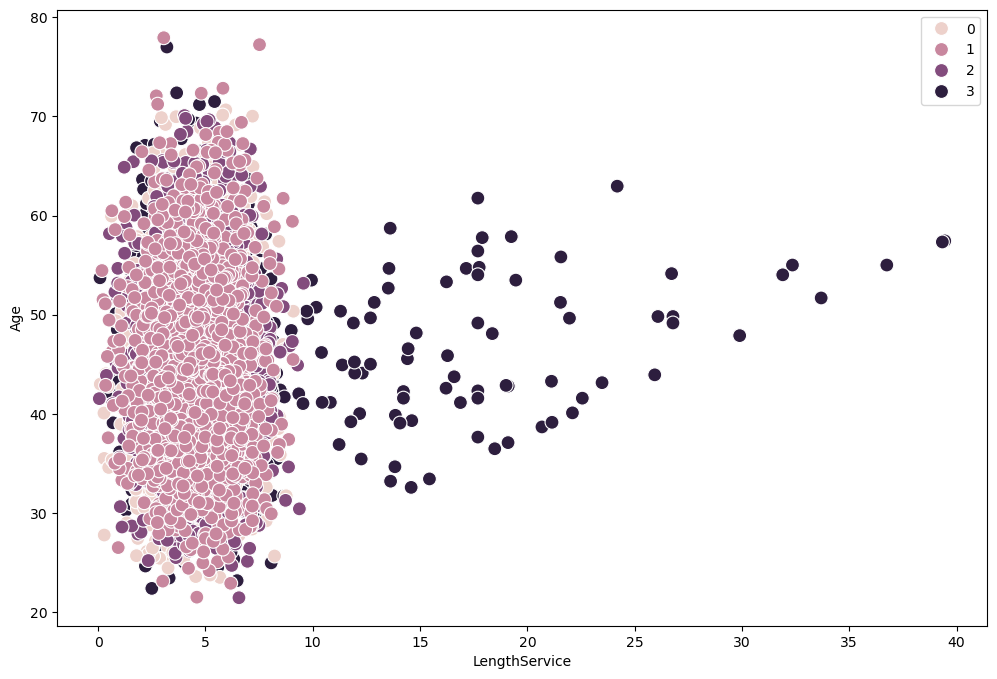

In [82]:
# Plot the clusters for the "LengthService" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['LengthService'], y=df['Age'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('LengthService') 
plt.ylabel('Age') 
plt.show()

The clusters in these scatter plots reveal some expected patterns and outliers. For instance, in the "Length of Service vs. Age" plot, most employees have a relatively short length of service, but there are a few with longer tenures that stand out. However, in terms of absenteeism, there’s a strong relationship between higher absentee hours and older employees, which makes sense as longer tenure often correlates with more senior staff. Some outliers, like short-tenured employees with high absenteeism, suggest further investigation might be needed. The clusters indicate that while there are distinct patterns, there is still significant overlap between the groups, suggesting that age, length of service, and absenteeism are interrelated but not independently determinative of clear clusters.

In [85]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [91]:
df.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'LengthService':['mean', 'median'], 
                         'AbsentHours':['mean', 'median']})

Age            LengthService           AbsentHours  \
                  mean     median          mean    median        mean   
cluster                                                                 
dark purple  44.971902  44.632432      5.205832  4.621035   73.941199   
light pink   44.276780  43.818522      4.540870  4.551546   72.088724   
pink         44.505708  44.045127      4.550356  4.568045   73.944975   
purple       44.204132  43.519162      4.619946  4.625567   72.619456   

                        
                median  
cluster                 
dark purple  66.952482  
light pink   68.137357  
pink         69.156813  
purple       68.037364

The values being so close to each other, only differing with slight varions show me that this model of clustering based on these numerical values were not really effective in differentiating the employees. It would be worthwhile to explore other models of clustering or other algorithms that would maybe employ also the categorical values with more meaningful results.